# 0.5_ss_chap6
6章の実装　


In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
%reload_ext autoreload

In [3]:
froaq src import utils
        11dfcv cnimport itertools
import logging
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
%matplotlib inline

In [4]:
from src.common.gradient import numerical_gradient
from src.common.gradient import numerical_gradient_on_array

In [5]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

# 中身

In [6]:
class SGD:
    ''' Simple stochasitc gradient descent
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
    

### 関数を書いてみる

In [7]:
def bowl(x):
        ''' f(x,y) = 1/20 * x[0]^2 + x[1]^2
        ベクトルで入ってきた場合と、2次元（マトリックス）で入ってき場合に対応する
        -> どんな形でも、結局これだけで対応できちゃう

        Parameters
        ----------
        x: np.ndarray
        x values
        y: np.ndarray
        y values

        Returns
        -------
        f(x,y) = 1/20 * x^2 + y^2
        '''
        # takes numpy as input
        if type(x) != np.ndarray:
                raise ValueError("Only takes numpy.array as input")

        return 1/20*x[0]**2 + x[1]**2


In [8]:
def bowl_grad(x):
        ''' Check that numerical gradient is correct
        f(x,y) = 1/20 * x^2 + y^2
        df/dx = x/10
        df/dy = 2*y
        '''
        # takes numpy as input
        if type(x) != np.ndarray:
                raise ValueError("Only takes numpy.array as input")

        # 点
        if x.ndim == 1:
                dx = x[0] / 10
                dy = x[1] * 2
                return np.array([dx, dy])

        # それ以上　
        raise ValueError("Not implemented")

### 勾配を書いてみる

# あの numerical_gradient の中身はなんなんだ
- 点ごとにgradを返す仕様だった 

In [9]:
x_debug = np.mgrid[-2:-1.5:.25, -2:-1.5:.25].T.reshape(-1, 2)

In [10]:
numerical_gradient_on_array(bowl, x_debug)

2018-11-11 15:18:15,966 - src.common.gradient - INFO - Calculate gradient on bowl
2018-11-11 15:18:15,970 - src.common.gradient - INFO - Shape of input is (4, 2)


array([[-0.2  , -4.   ],
       [-0.175, -4.   ],
       [-0.2  , -3.5  ],
       [-0.175, -3.5  ]])

# 勾配計算、表示

In [11]:
xymesh = np.mgrid[-2:2:.25, -2:2:.25]
xymesh.ndim

3

In [12]:
X, Y = np.mgrid[-2:2:.25, -2:2:.25]

In [13]:
x_input = np.array([X, Y]).T.reshape(-1, 2)

In [79]:
grad = numerical_gradient_on_array(bowl, x_input)

2018-11-11 17:00:19,081 - src.common.gradient - INFO - Calculate gradient on bowl
2018-11-11 17:00:19,083 - src.common.gradient - INFO - Shape of input is (256, 2)


In [80]:
grad = grad.T.reshape(2, -1)

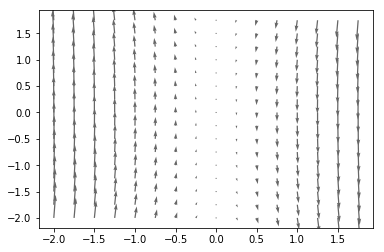

In [81]:
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")

# 同心円的な

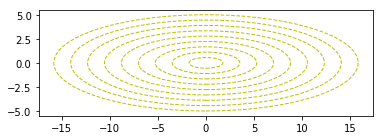

In [63]:

fig, ax = plt.subplots()

# fc = face color, ec = edge color
h = 0.1
for h in np.linspace(0, 10, 10):
        e = patches.Ellipse(xy=(0, 0), width=h*np.sqrt(10), height=h, 
                    fill=False, ec='y', linestyle="--")
        ax.add_patch(e)

plt.axis('scaled')
ax.set_aspect('equal')

In [65]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

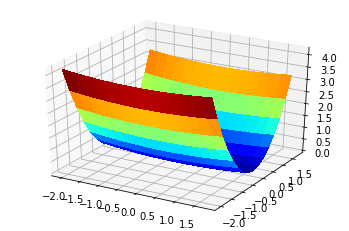

In [74]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Z = bowl(np.array([X, Y]))
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                       cmap=cm.jet,linewidth=0.1, antialiased=False)